<a href="https://colab.research.google.com/github/XinminChuUMB/cs480student/blob/main/%5C01%5CCS480_Assignment_1_XChu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

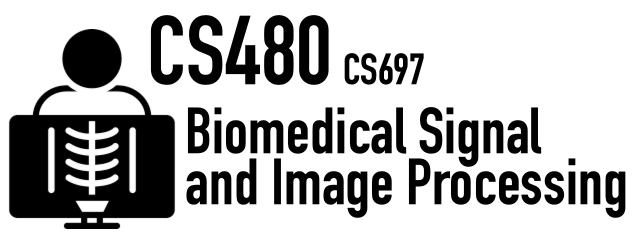
# Assignment 1


Student: Xinmin Chu

Date: Feb 13, 2022

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.misc import electrocardiogram # scipy is a python scientific computing library
ecg = electrocardiogram() # let's load the scipy ECG dataset

In [3]:
SAMPLING_RATE = 360 # this data was sampled with 360 Hz

**Task 1:** Plot the data in the range from 9 to 11 seconds! [30 Points]

In [4]:
# TODO your plotting code goes here
# please take the sampling rate into account to only plot the range
# between 9 and 11 seconds
#plt.plot(ecg[8*360:11*360])

In [5]:
ECG_from9to11 = ecg[8 * SAMPLING_RATE: 11 * SAMPLING_RATE]
#len(ECG_from9to11)

Text(0.5, 1.0, 'ECG plot between 9 and 11 seconds')

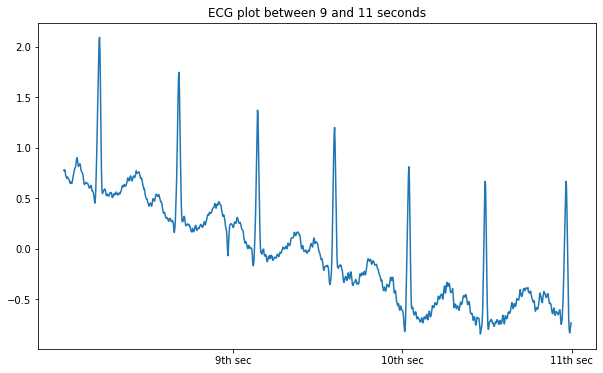

In [6]:
fix, ax = plt.subplots(figsize=(10, 6))
ax.plot(ECG_from9to11)
positions = (SAMPLING_RATE, 2*SAMPLING_RATE, 3*SAMPLING_RATE)
labels = ("9th sec", "10th sec", "11th sec")
xticks(positions, labels)
ax.set_title('ECG plot between 9 and 11 seconds')

# New Section

**Task 2:** Use Neurokit to detect the R spikes! [30 Points]

In [ ]:
# now can you see the P Q R S T waves? it's actually a pretty good signal despite
# the shift in the baseline

In [7]:
# we now need to install the neurokit2 library
!pip install neurokit2
import neurokit2 as nk

     |████████████████████████████████| 1.1 MB 5.3 MB/s 


In [8]:
# we can use neurokit's function to detect the R spikes
_, rpeaks = nk.ecg_peaks(ecg, sampling_rate=SAMPLING_RATE)

In [9]:
# look at rpeaks - the numbers indicate the samples that are R spikes
print(rpeaks['ECG_R_Peaks'][0:10]) # here only the first ten

[ 125  343  552  748  944 1130 1317 1501 1691 1880]


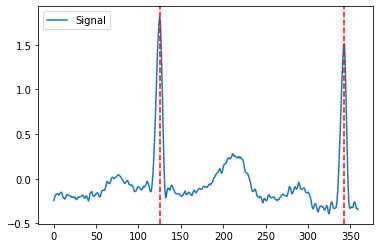

In [10]:
# you can also plot the first two detected R spikes
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][0:2], ecg[0:SAMPLING_RATE])

In [ ]:
# TODO Can you write code to plot the R spikes between 9 and 11 seconds?
# Hint: one solution could be to just detect peaks in the range you specified for Task 1
# Hint 2: you might need to extend the range by +- 1 second to see the five peaks from Task 1

In [12]:
# Use neurokit's function to detect the R spikes from 9 to 11 seconds
_, rpeaks9_11 = nk.ecg_peaks(ECG_from9to11, sampling_rate=SAMPLING_RATE)

In [13]:
# look at rpeaks - the numbers indicate the samples that are R spikes
print(rpeaks9_11['ECG_R_Peaks']) # from 9 to 11

[245 412 576 734 896]


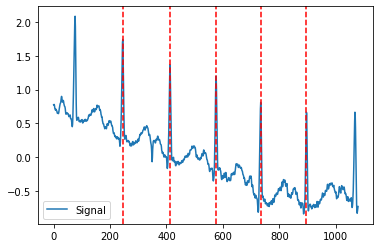

In [14]:
# Plot the R spikes from 9 to 11 seconds
plot9_11 = nk.events_plot(rpeaks9_11['ECG_R_Peaks'][0:5], ECG_from9to11)

**Task 3:** Detect Heartrate. [15 Points]

In [ ]:
# TODO Does the patient have a regular heart rate? If yes, which one? (estimate is fine)
# Hint: you can use the rpeaks for that 

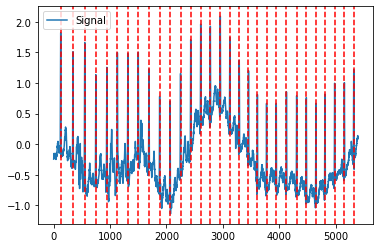

In [15]:
_, rpeaks = nk.ecg_peaks(ecg, sampling_rate=SAMPLING_RATE)
#print(rpeaks['ECG_R_Peaks'][0:30])
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][0:30], ecg[0:15*SAMPLING_RATE])

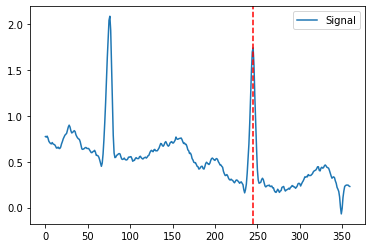

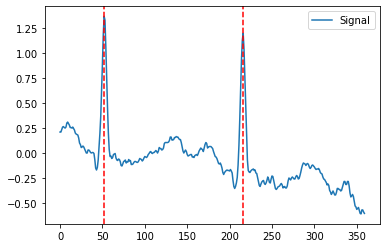

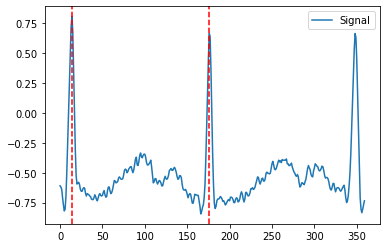

In [16]:
plot_9 = nk.events_plot(rpeaks9_11['ECG_R_Peaks'][0:1], ECG_from9to11[0:SAMPLING_RATE])
plot_10 = nk.events_plot(rpeaks9_11['ECG_R_Peaks'][1:3] - 360, ECG_from9to11[SAMPLING_RATE: 2*SAMPLING_RATE])
plot_11 = nk.events_plot(rpeaks9_11['ECG_R_Peaks'][3:] - 720, ECG_from9to11[2*SAMPLING_RATE: 3*SAMPLING_RATE])

From the r peaks of ECG in first 15 second, the patient's heart doesn't work well, because (1) the R peaks vary much obviously, and (2) the S points are always higher than the Q points in each cycle.

**Task 4:** Detect P Q S T Peaks. [25 Points]

In [ ]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the range of 9 to 11 seconds?
# Hint: Look at the tutorial: https://neurokit2.readthedocs.io/en/latest/examples/ecg_delineate.html#Locate-other-waves-(P,-Q,-S,-T)-and-their-onset-and-offset
# Hint 2: The plot will have blue, orange, green, and red circles :)

In [17]:
# Delineate the ECG signal
_, rpeaks = nk.ecg_peaks(ECG_from9to11, sampling_rate=SAMPLING_RATE)

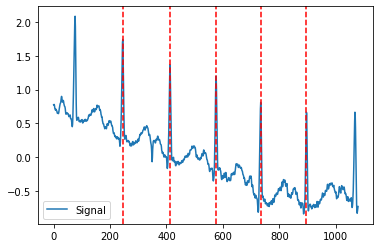

In [18]:
# Visualize R-peaks in ECG signal
#plot = nk.events_plot(rpeaks['ECG_R_Peaks'], ECG_from9to11)

In [19]:
# Delineate the ECG signal
_, waves_peak = nk.ecg_delineate(ECG_from9to11, rpeaks, sampling_rate=SAMPLING_RATE, method="peak")

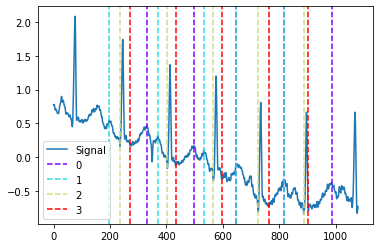

In [20]:
# Visualize the T-peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_peak['ECG_T_Peaks'], 
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], ECG_from9to11)


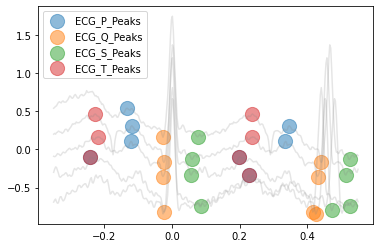

In [21]:
# Delineate the ECG signal and visualizing all peaks of ECG complexes
_, waves_peak = nk.ecg_delineate(ECG_from9to11, rpeaks, sampling_rate=SAMPLING_RATE, method="peak", show=True, show_type='peaks')

In [ ]:
# TODO Does the detection work well?

Yes. The PQST points are detected and shown well. Meanwhile, some T peaks were absent around the 10th second. 

**Bonus Task:** Detect P Q S T Peaks for the full signal before and after filtering. [33 Points]

In [ ]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
# Hint: For plotting, 1000 samples / 5 rpeaks gives a nice overview.

In [40]:
# Delineate the ECG signal
_, rpeaks = nk.ecg_peaks(ecg, sampling_rate= 4*SAMPLING_RATE)

In [41]:
#rpeaks

{'ECG_R_Peaks': array([   495,   7155,  10306,  15038,  21170,  30936,  32867,  33881,
         35829,  37470,  41347,  45533,  49017,  52076,  73810,  75188,
         81195,  83284,  85523,  87006,  97056, 100993, 104863, 107376,
        107909]), 'sampling_rate': 1440}

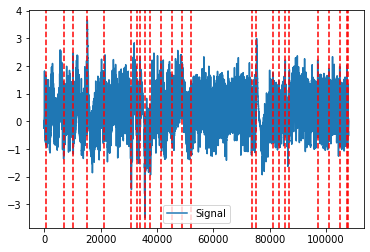

In [42]:
# Visualize R-peaks in ECG signal
plot = nk.events_plot(rpeaks['ECG_R_Peaks'], ecg)

In [43]:
# Delineate the ECG signal
_, waves_peak = nk.ecg_delineate(ecg, rpeaks, sampling_rate=4 * SAMPLING_RATE, method="peak")

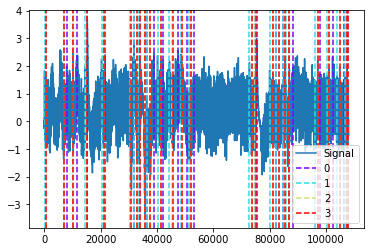

In [44]:
# Visualize the T-peaks, P-peaks, Q-peaks and S-peaks for the whole signal
plot = nk.events_plot([waves_peak['ECG_T_Peaks'], 
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], ecg)

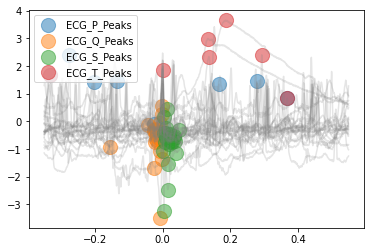

In [45]:
# Delineate the ECG signal and visualizing all peaks of ECG complexes
_, waves_peak = nk.ecg_delineate(ecg, rpeaks, sampling_rate=4*SAMPLING_RATE, method="peak", show=True, show_type='peaks')

In [ ]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

In [47]:
 # Filter the ecg signal
 ecg_filtered = nk.signal_filter(ecg, sampling_rate=6 * SAMPLING_RATE, 
                                 lowcut=0.5, highcut=1000, method="butterworth", 
                                 order=2, window_size="default", powerline=50)

In [48]:
# Delineate the ECG signal
_, rpeaks = nk.ecg_peaks(ecg_filtered, sampling_rate= 6 * SAMPLING_RATE)

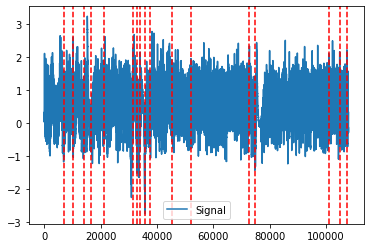

In [49]:
# Visualize R-peaks in ECG signal
plot = nk.events_plot(rpeaks['ECG_R_Peaks'], ecg_filtered)

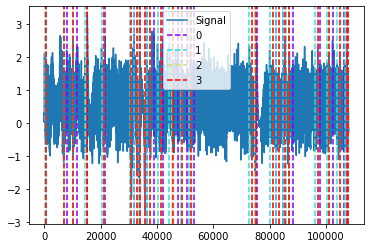

In [50]:
# Visualize the T-peaks, P-peaks, Q-peaks and S-peaks for the whole signal
plot = nk.events_plot([waves_peak['ECG_T_Peaks'], 
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], ecg_filtered)

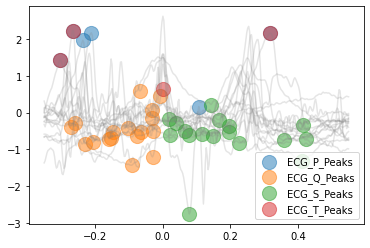

In [51]:
# Delineate the ECG signal and visualizing all peaks of ECG complexes
_, waves_peak = nk.ecg_delineate(ecg_filtered, rpeaks, sampling_rate=SAMPLING_RATE, method="peak", show=True, show_type='peaks')

In [ ]:
# TODO Does the filtering improve the result?

Yes. The signal filtering does improve the detection of PQST peaks and become clear and smooth.

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#